In [1]:
import tensorflow as tf
import math
import numpy as np

sess = tf.InteractiveSession()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Make some fake data, 1 data points
image = np.random.randint(10,size=[1,10,10]) + np.eye(10)*10

# TensorFlow placeholder
# None is for batch processing 
# (-1 keeps same size)
# 10x10 is the shape
# 1 is the number of "channels" 
# (like RGB colors or gray)
x = tf.placeholder("float", [None, 10, 10])
x_im = tf.reshape(x, [-1,10,10,1])

In [4]:
### Convolutional Layer

# Window size to use, 3x3 here
winx = 3
winy = 3

# How many features to compute on the window
num_filters = 2

# Weight shape should match window size
# The '1' represents the number of 
# input "channels" (colors)
W1 = tf.Variable(tf.truncated_normal(
    [winx, winy,1, num_filters],
    stddev=1./math.sqrt(winx*winy)))
b1 = tf.Variable(tf.constant(
    0.1,shape=[num_filters]))

# 3x3 convolution, Pad with zeros on edges
# Strides is how to step, here 1 pixel at a time
xw = tf.nn.conv2d(x_im, W1,
        strides=[1, 1, 1, 1],
        padding='SAME')
h1 = tf.nn.relu(xw + b1)

In [5]:
# Remember to initialize!
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


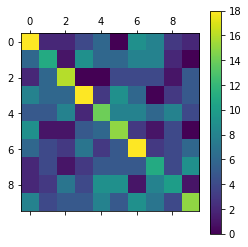

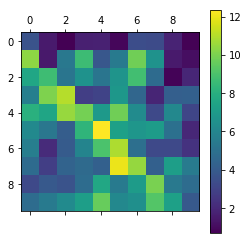

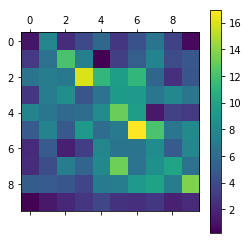

In [7]:
# Peek inside
H = h1.eval(feed_dict = {x: image})

# Let's take a look
import matplotlib.pyplot as plt
plt.ion()

# Original
plt.matshow(image[0])
plt.colorbar()

# Conv channel 1
plt.matshow(H[0,:,:,0])
plt.colorbar()

# Conv channel 2
plt.matshow(H[0,:,:,1])
plt.colorbar()

In [8]:
### Pooling Layer
# "Max" pooling keeps best of 2x2 square
# in h1 output
# ksize defines size of this block
# "VALID" padding means incomplete squares are
# not used
# Stride of 2x2 means no overlap of 2x2 blocks
p1 = tf.nn.max_pool(h1, ksize=[1, 2, 2, 1],
          strides=[1, 2, 2, 1], padding='VALID')

In [9]:
# We automatically determine the size
p1_size = np.product([s.value for s in p1.get_shape()[1:]])

# Need to flatten convolutional output for use
# in a dense layer
# -1 chooses appropriate shape to keep overall
# size the same
p1f = tf.reshape(p1, [-1, p1_size ])

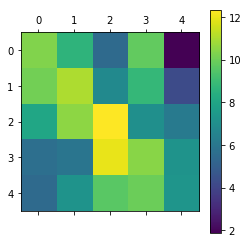

In [18]:
# Pooling Layer before flattening
# Note how it's only 5x5, because we took the
# best(max) of every 2x2 window
P = p1.eval(feed_dict = {x: image})
plt.matshow(P[0,:,:,0])
plt.colorbar()

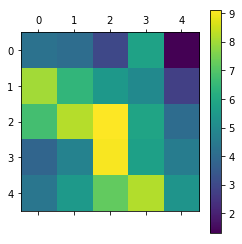

In [19]:
#test of tf.nn.avg_pool
p2 = tf.nn.avg_pool(h1, ksize=[1, 2, 2, 1],
          strides=[1, 2, 2, 1], padding='VALID')

Pa = p2.eval(feed_dict = {x: image})
plt.matshow(Pa[0,:,:,0])
plt.colorbar()